In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
df = pd.read_csv('../1lab/stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df = df.dropna()
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
work_types = df["work_type"].unique()
work_types_dict = dict(zip(work_types, range(len(work_types))))
df["work_type"] = df["work_type"].replace(work_types_dict)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,0,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,0,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,0,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,1,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,0,Urban,186.21,29.0,formerly smoked,1


In [8]:
train, test = train_test_split(df)

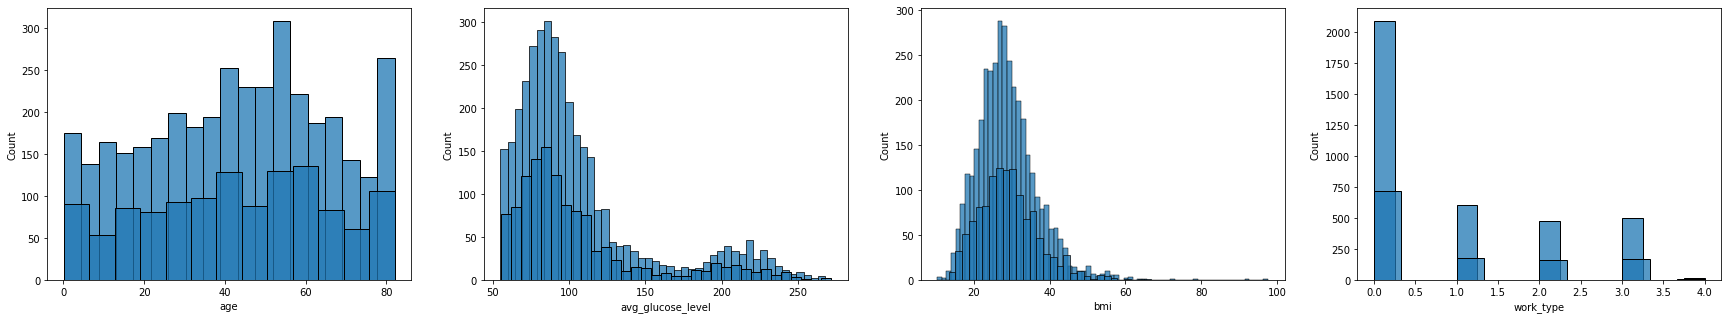

In [9]:
signs = ["age", "avg_glucose_level", "bmi", "work_type"]
plt.figure(figsize=(30,5))
for i, sign in enumerate(signs):
    plt.subplot(1, len(signs), i+1)
    sns.histplot(data=train, x=sign)
    sns.histplot(data=test, x=sign)
plt.show()

In [10]:
x_train = train[signs[:-1]].to_numpy()
y_train = train[signs[-1]].to_numpy()
x_test = test[signs[:-1]].to_numpy()
y_test = test[signs[-1]].to_numpy()

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(len(train.columns)-1, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(work_types), activation='relu')
])

model.compile(optimizer='adam',
              loss='mean_squared_error'
)

model.fit(x_train, y_train, verbose=0, batch_size=10, epochs=10)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(f'Precision: {precision_score(y_test, y_pred, average="micro")}')
print(f'Recall: {recall_score(y_test, y_pred, average="micro")}')

Precision: 0.5855048859934854
Recall: 0.5855048859934854


In [12]:
params = [
    {
        'layers': [
            tf.keras.layers.Dense(len(train.columns)-1, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(len(work_types), activation='relu')
        ],
        'optimizer': 'adam'
    },
    {
        'layers': [
            tf.keras.layers.Dense(len(train.columns)-1, activation='selu'),
            tf.keras.layers.Dense(128, activation='selu'),
            tf.keras.layers.Dense(len(work_types), activation='selu')
        ],
        'optimizer': 'adam'
    },
    {
        'layers': [
            tf.keras.layers.Dense(len(train.columns)-1, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(len(work_types), activation='relu')
        ],
        'optimizer': 'rmsprop'
    },
]

for i, p in enumerate(params):
    model = tf.keras.Sequential(p['layers'])

    model.compile(optimizer=p['optimizer'],
                  loss='mean_squared_error'
    )

    model.fit(x_train, y_train, verbose=0, batch_size=10, epochs=10)

    y_pred = model.predict(x_test)
    y_pred = np.argmax(y_pred, axis=1)
    print(f'Parameters #{i+1}')
    print(f'Precision: {precision_score(y_test, y_pred, average="micro")}')
    print(f'Recall: {recall_score(y_test, y_pred, average="micro")}\n')

Parameters #1
Precision: 0.5464169381107492
Recall: 0.5464169381107492

Parameters #2
Precision: 0.21254071661237786
Recall: 0.21254071661237786

Parameters #3
Precision: 0.5855048859934854
Recall: 0.5855048859934854

